# **Análise exploratória dos dados**

Entender como estão estruturados os dados da base de dados da produção hospitalar

## **Preparando o ambiente**

In [ ]:
# Importando bibliotecas a serem utilizadas no arquivo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
import plotly.express as px
from plotly import graph_objects as go
from plotly import offline as pyo
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

from statsmodels.tsa.stattools import (adfuller,
                                       acf, pacf)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             r2_score)
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# Clonando o repositório para utilização neste notebook

!git clone https://github.com/iggorbrito/DataAnalysis.git

fatal: destination path 'DataAnalysis' already exists and is not an empty directory.


## **Configuração da base de dados tratada**

Verificação de que tipo de dados a base é composta, quantas entradas, colunas, etc.

In [ ]:
df = pd.read_csv('/content/DataAnalysis/hospitalar_production/docs/dados_tratados.csv')

df.head(27)

,Região/Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago
0,RO,4209.370,16397.030,133645.190,346912.840,711758.310,1829559.710,1940792.630,1955721.680,2143353.810,...,10172549.540,10171206.310,10740989.450,10016556.600,12293282.070,12219359.190,11890194.030,10665326.680,8605286.310,6663659.440
1,AC,10470.070,14001.710,86200.850,301323.680,769612.360,1731744.620,1743978.660,2057439.020,2057829.690,...,4029748.150,3956231.610,4031485.580,3681605.490,4621768.840,4396294.920,4782589.780,4942017.560,3825134.080,2036113.500
2,AM,35752.720,45570.640,416012.300,2020381.790,5949408.990,11419210.080,7934652.100,8641517.130,8531576.490,...,19430986.320,18254068.200,18240136.150,18092793.180,20887366.240,21078288.950,22816701.330,22253915.190,20493652.360,14405538.400
3,RR,4785.910,11858.630,43852.670,369328.510,470676.430,808448.390,771687.830,876091.180,896952.530,...,4672985.430,3837710.720,3970057.610,3568884.820,5034623.410,4214754.880,4264412.630,2728019.670,1679054.650,725887.920
4,PA,181159.290,433414.740,1893197.500,5105406.440,13162823.430,21762104.160,20126081.010,22149375.820,23436682.750,...,45952478.610,45055260.270,48234409.100,43513514.970,50938440.730,48148818.340,52211031.920,47777534.840,41483958.960,33968335.860
5,AP,33672.740,104822.980,118378.280,226661.180,844019.900,1329876.610,1275063.720,1177745.930,1396371.510,...,3032253.400,2836766.190,3154659.590,2996757.480,4543352.100,4604623.550,5777218.040,5493103.920,3073655.350,2792863.710
6,TO,4113.760,76633.060,343702.610,1068685.940,3022200.870,5136474.610,5051932.070,5200151.870,5343714.730,...,8489605.490,8432453.160,7800730.720,7308900.700,9391509.680,8327289.400,9616158.680,7981779.560,5292783.440,2846132.450
7,MA,385330.180,1018352.930,2277717.780,4334468.230,8832514.850,21551600.330,13452263.930,14750895.330,15148647.110,...,35882717.690,36518499.980,38887699.730,34053472.340,40655818.090,37215336.830,40735859.610,38379115.380,30889581.910,22973925.830
8,PI,220788.250,353468.670,1078182.680,2406035.320,4929772.930,11375419.370,9711680.200,10428191.090,10227943.000,...,20474808.490,19660340.800,20886379.940,18842409.900,22597398.780,21021918.460,24234187.770,22043390.460,22099111.730,19051255.100
9,CE,357904.650,572356.180,1865065.710,5131814.390,10798042.860,32444328.540,27643304.860,30085370.220,31376221.000,...,60310435.260,58032892.470,63407898.890,55639872.010,66940835.750,61640476.850,67918482.170,60645637.150,53711346.470,40906940.990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 194 entries, Região/Unidade da Federação to 2023/Ago
dtypes: float64(193), object(1)
memory usage: 41.0+ KB


In [ ]:
df.shape

(27, 194)

## **Estatística Descritiva**

Descrição, resumo e interpretação de conjuntos de dados

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago
count,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,...,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000,27.000
mean,304952.774,788145.259,2440162.964,5517354.049,12337159.422,78716771.420,23839418.131,25893771.881,26222135.863,26230106.737,...,58140043.942,56380704.470,60262740.138,54599030.804,65123945.438,60350635.635,66170482.683,61373582.911,56320294.814,47997676.290
std,392806.000,1071747.558,3421972.104,7767711.288,16345863.651,211237401.741,34540721.774,34862938.447,34824704.039,35103725.059,...,73584616.288,71391087.462,76651506.931,69067462.983,81324504.029,75073780.994,82065995.409,76803207.442,72351275.709,65749002.765
min,4113.760,11858.630,43852.670,226661.180,470676.430,808448.390,771687.830,876091.180,896952.530,1027288.730,...,3032253.400,2836766.190,3154659.590,2996757.480,4543352.100,4214754.880,4264412.630,2728019.670,1679054.650,725887.920
25%,46580.415,139423.940,505778.420,1410610.810,3650090.005,8257222.370,7932273.515,8926011.345,8764559.620,9229049.700,...,18546045.235,17868832.550,17608013.835,16467258.390,19795293.650,19304378.135,21130591.100,19885157.765,18332807.625,13164146.680
50%,179395.820,418053.580,1152115.250,2406035.320,5949408.990,16599004.840,10215956.800,12262049.080,12453466.980,11900817.000,...,26067847.000,24295815.850,29294886.930,24993772.250,29093816.980,28424582.420,30221518.650,28459022.480,27014747.550,23443331.550
75%,392985.515,969999.750,2625635.630,5915821.605,13394973.350,52156843.265,26932691.980,30400866.015,30982776.895,31307258.670,...,76377385.100,74114339.045,78726347.945,72553818.085,84980768.900,80700771.595,88549776.195,84692602.955,79514857.620,67644691.445
max,1665349.900,4434168.640,14577395.840,35032259.980,76668547.410,1092387739.600,173450905.160,170838571.280,170565809.870,172706721.520,...,345571036.450,335048077.380,362751505.620,325356403.770,379581745.370,352252870.400,382190826.230,359173548.320,342126820.520,314669514.240


## **Visualização dos dados**

A visualização de dados é uma prática importante na análise de dados, pois permite que informações complexas sejam apresentadas de maneira mais compreensível e acessível por meio de gráficos.

In [ ]:
# Baixando o shapefile do Brasil de uma fonte alternativa
url_alternativa = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
response = requests.get(url_alternativa)

# Criando um GeoDataFrame com o GeoJSON baixado
mapa_brasil = gpd.read_file(response.text)

mapa_brasil.head()

,id,name,sigla,regiao_id,codigo_ibg,cartodb_id,created_at,updated_at,geometry
0,1,Acre,AC,3,12,1,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ..."
1,2,Alagoas,AL,4,27,2,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ..."
2,3,Amazonas,AM,3,13,3,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2..."
3,4,Amapá,AP,3,16,4,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-51.18168 4.00889, -51.17900 3..."
4,5,Bahia,BA,4,29,5,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-39.28820 -8.56290, -39.28229 ..."


In [ ]:
#Mergeando dados do df no mapa_brasil

df.rename(columns={'Região/Unidade da Federação': 'sigla'}, inplace=True)

mapa_brasil = pd.merge(mapa_brasil, df, on='sigla', how='left')
mapa_brasil.head(27)

,id,name,sigla,regiao_id,codigo_ibg,cartodb_id,created_at,updated_at,geometry,2007/Ago,...,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago
0,1,Acre,AC,3,12,1,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",10470.070,...,4029748.150,3956231.610,4031485.580,3681605.490,4621768.840,4396294.920,4782589.780,4942017.560,3825134.080,2036113.500
1,2,Alagoas,AL,4,27,2,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ...",104243.750,...,17661104.150,17483596.900,16975891.520,14841723.600,18703221.060,17586837.810,19444480.870,18249513.320,17361613.040,14397808.730
2,3,Amazonas,AM,3,13,3,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2...",35752.720,...,19430986.320,18254068.200,18240136.150,18092793.180,20887366.240,21078288.950,22816701.330,22253915.190,20493652.360,14405538.400
3,4,Amapá,AP,3,16,4,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-51.18168 4.00889, -51.17900 3...",33672.740,...,3032253.400,2836766.190,3154659.590,2996757.480,4543352.100,4604623.550,5777218.040,5493103.920,3073655.350,2792863.710
4,5,Bahia,BA,4,29,5,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-39.28820 -8.56290, -39.28229 ...",135146.360,...,86575347.490,86939388.850,90728803.680,81921957.790,99852676.770,89774012.390,101919999.380,88138679.590,86766812.310,74652360.700
5,6,Ceará,CE,4,23,6,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-40.01804 -2.83698, -40.00587 ...",357904.650,...,60310435.260,58032892.470,63407898.890,55639872.010,66940835.750,61640476.850,67918482.170,60645637.150,53711346.470,40906940.990
6,7,Distrito Federal,DF,5,53,7,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-47.30861 -16.03549, -47.31095...",191951.470,...,25605313.280,24295815.850,29294886.930,24993772.250,28977515.460,28424582.420,29875629.050,28010286.250,26311956.620,24116373.150
7,8,Espírito Santo,ES,2,32,8,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804...",57408.110,...,35769435.100,36434298.390,37390598.580,34916435.490,41980813.460,38767098.890,43048559.480,39688527.030,36681183.380,29371356.360
8,9,Goiás,GO,5,52,9,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-50.15776 -12.41195, -50.15901...",179395.820,...,42701597.020,42368644.000,46837764.920,43294415.380,49874495.020,45617227.270,48244871.000,44924389.000,42800068.390,36970491.880
9,10,Maranhão,MA,4,21,10,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-47.03102 -8.98549, -47.02113 ...",385330.180,...,35882717.690,36518499.980,38887699.730,34053472.340,40655818.090,37215336.830,40735859.610,38379115.380,30889581.910,22973925.830


<ipython-input-185-70b57eaca598>:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




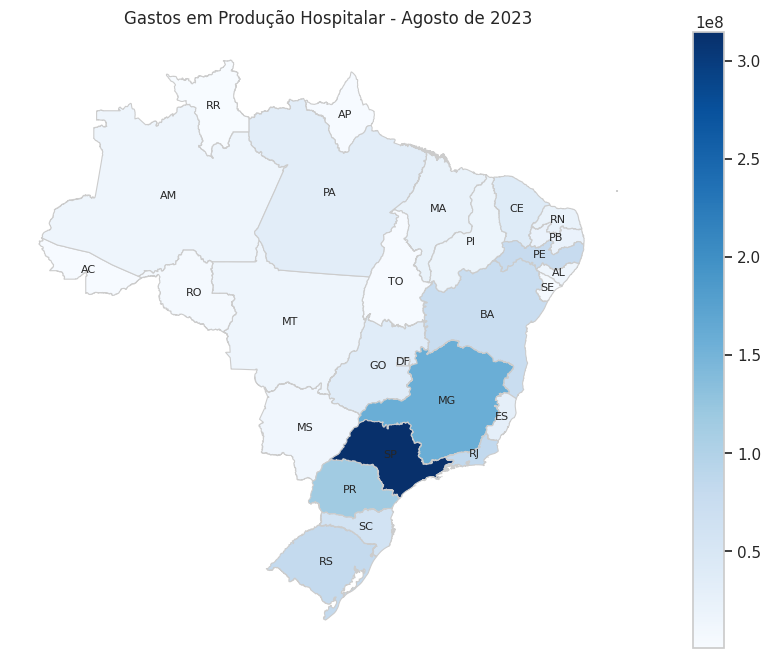

In [ ]:
# Seu código para selecionar colunas relevantes
mapa_brasil_subset = mapa_brasil[['sigla', 'geometry', '2023/Ago']]

# Plotar o mapa do Brasil com base nos gastos por sigla em agosto de 2023
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
cax = mapa_brasil_subset.plot(column='2023/Ago', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adicionar rótulos aos estados
for x, y, label in zip(mapa_brasil_subset.geometry.centroid.x, mapa_brasil_subset.geometry.centroid.y, mapa_brasil_subset['sigla']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Configurações adicionais
ax.set_title('Gastos em Produção Hospitalar - Agosto de 2023')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()

In [ ]:
# Dividir por 100.000.000 (8 zeros)
data_subset['2023/Ago'] = data_subset['2023/Ago'] * 100000000

# Ordenar os dados por '2023/Ago_y' em ordem decrescente
data_subset = data_subset.sort_values(by='2023/Ago', ascending=False)

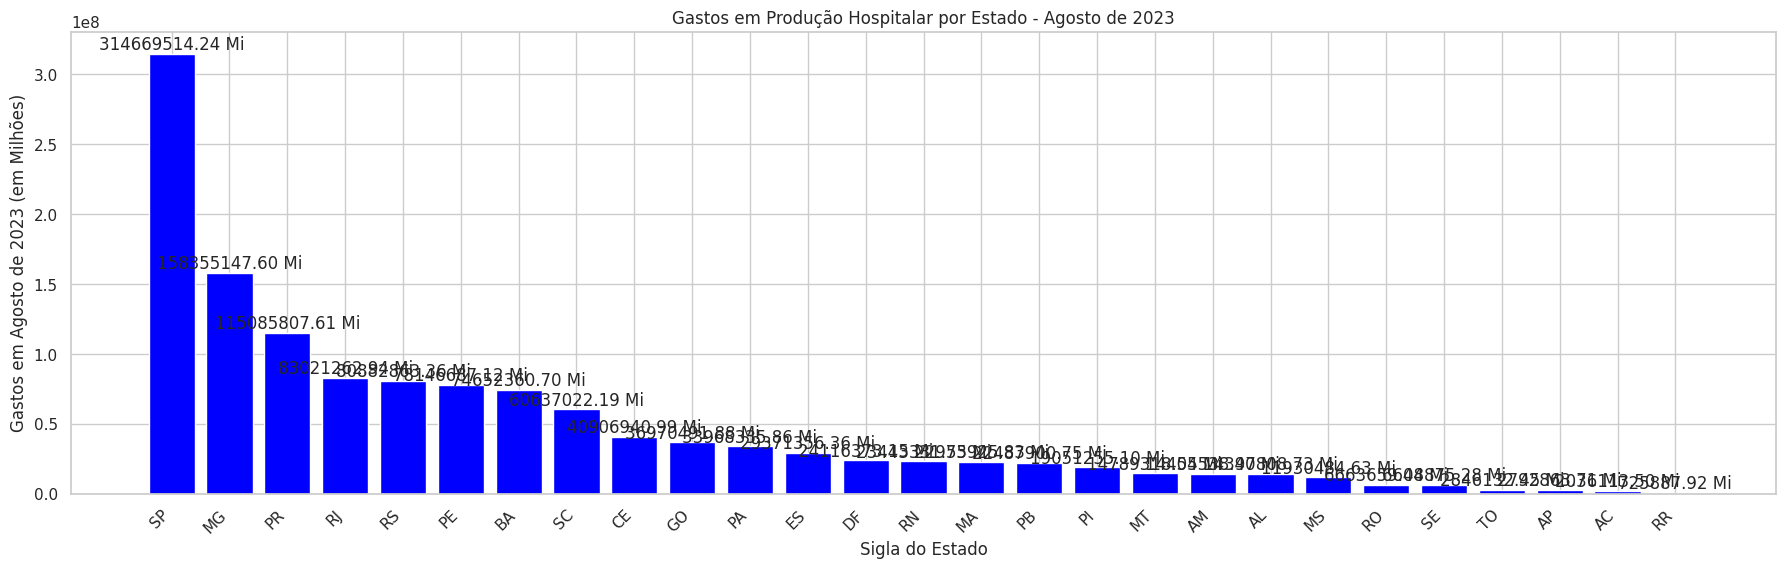

In [ ]:
# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(22, 6))
bars = ax.bar(data_subset['sigla'], data_subset['2023/Ago'], color='blue')

# Adicionar rótulos e título
ax.set_xlabel('Sigla do Estado')
ax.set_ylabel('Gastos em Agosto de 2023 (em Milhões)')
ax.set_title('Gastos em Produção Hospitalar por Estado - Agosto de 2023')

# Adicionar rótulos nos topos das barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f} Mi', ha='center', va='bottom')

# Rotacionar rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico de barras
plt.show()

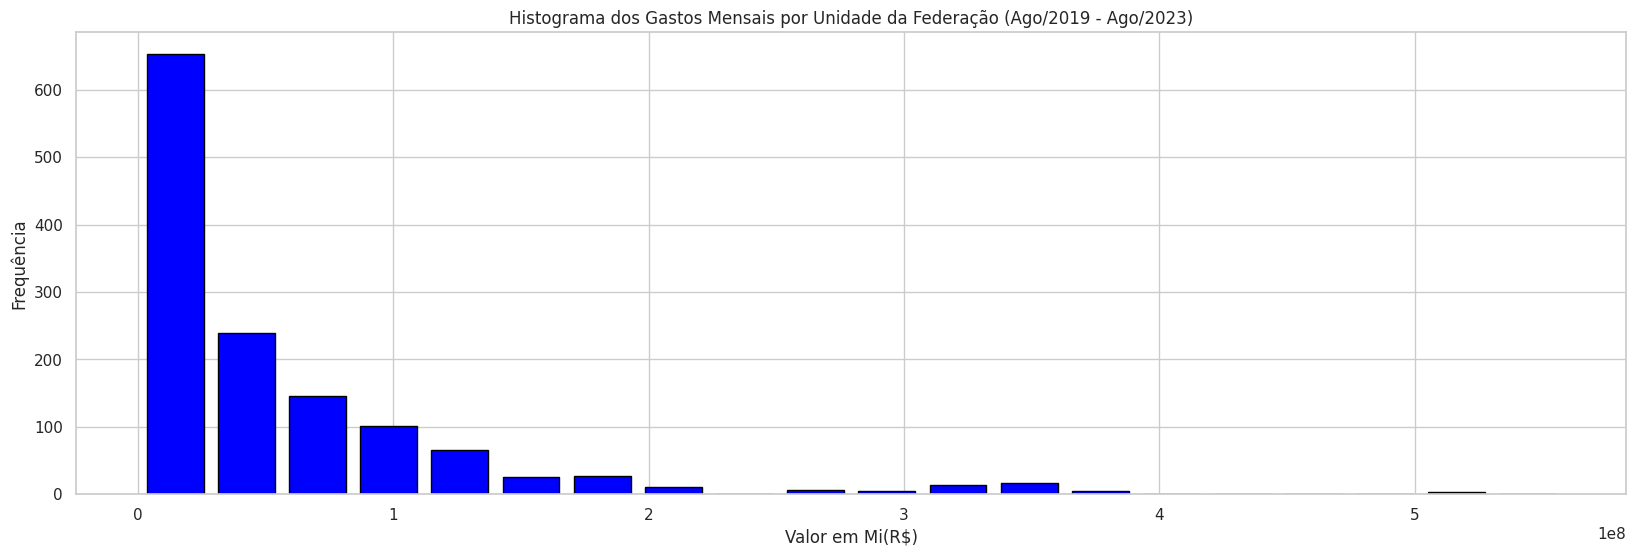

In [ ]:
# Selecionando as colunas do período desde "Ago/2019" até o último mês disponível
dados_periodo_abrangente = df.loc[:, '2019/Ago':'2023/Ago']

# Empilhando os dados para criar um único conjunto de valores
dados_todos_os_meses = dados_periodo_abrangente.stack()

# Criando o histograma
plt.figure(figsize=(20, 6))
plt.hist(dados_todos_os_meses, bins=20, color='blue', edgecolor='black', rwidth=0.8)

# Adicionando rótulos e título
plt.title('Histograma dos Gastos Mensais por Unidade da Federação (Ago/2019 - Ago/2023)')
plt.xlabel('Valor em Mi(R$)')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.show()

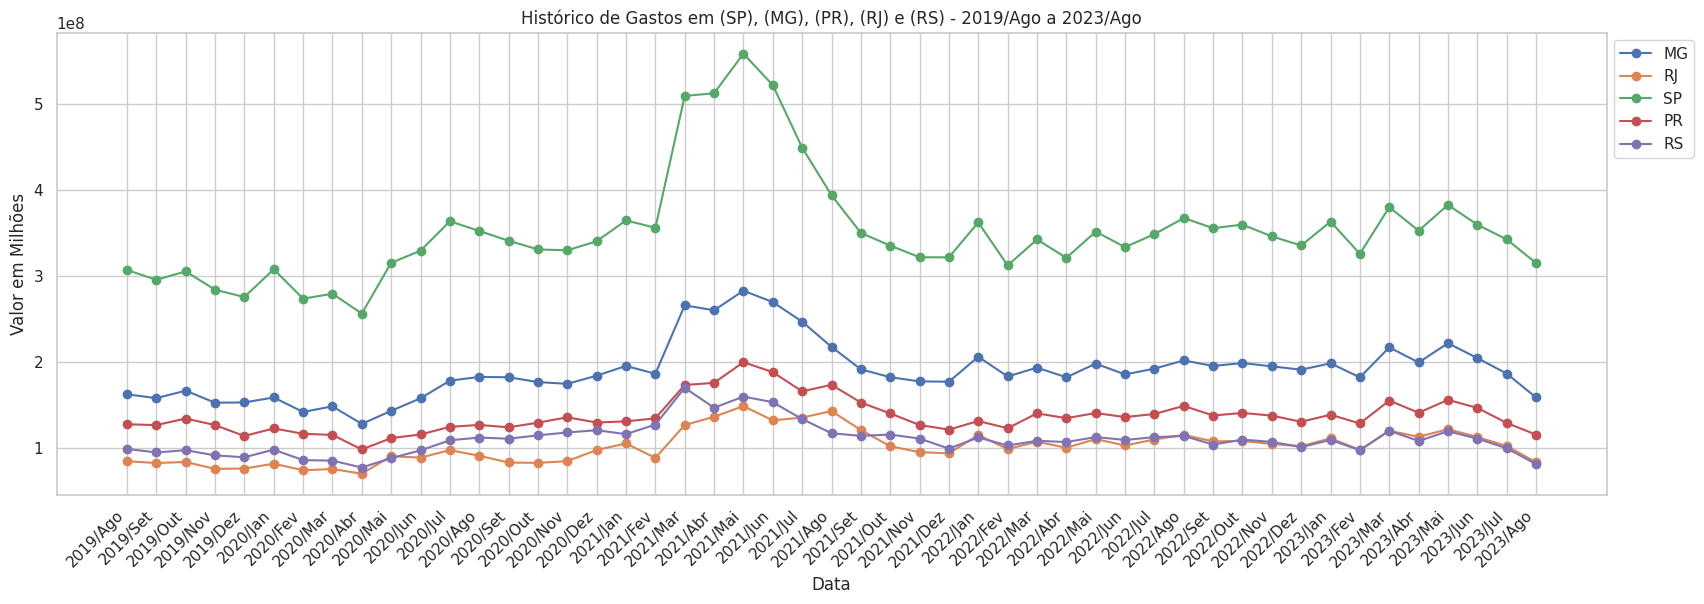

In [ ]:
# Selecionar apenas as linhas correspondentes aos estados de SP, MG, PR, RJ e RS
states_data = df[df['sigla'].isin(['SP', 'MG', 'PR', 'RJ', 'RS'])]

# Selecionar apenas as colunas relevantes para o histórico
historical_data = states_data.loc[:, ['sigla', '2019/Ago', '2019/Set', '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai', '2021/Jun', '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov', '2021/Dez', '2022/Jan', '2022/Fev', '2022/Mar', '2022/Abr', '2022/Mai', '2022/Jun', '2022/Jul', '2022/Ago', '2022/Set', '2022/Out', '2022/Nov', '2022/Dez', '2023/Jan', '2023/Fev', '2023/Mar', '2023/Abr', '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago']]

# Transpor os dados para que as datas se tornem os rótulos do eixo x
historical_data = historical_data.set_index('sigla').transpose()

# Converter o índice para strings
historical_data.index = historical_data.index.astype(str)

# Criar o gráfico de linha
fig, ax = plt.subplots(figsize=(20, 6))

# Adicionar linhas para cada estado
for state in historical_data.columns:
    ax.plot(historical_data.index, historical_data[state], marker='o', linestyle='-', label=state)

# Adicionar rótulos e título
ax.set_xlabel('Data')
ax.set_ylabel('Valor em Milhões')
ax.set_title('Histórico de Gastos em (SP), (MG), (PR), (RJ) e (RS) - 2019/Ago a 2023/Ago')

# Adicionar legenda para facilitar a identificação das linhas
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotacionar rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar grade para facilitar a leitura
plt.grid(True)

# Mostrar o gráfico de linha
plt.show()

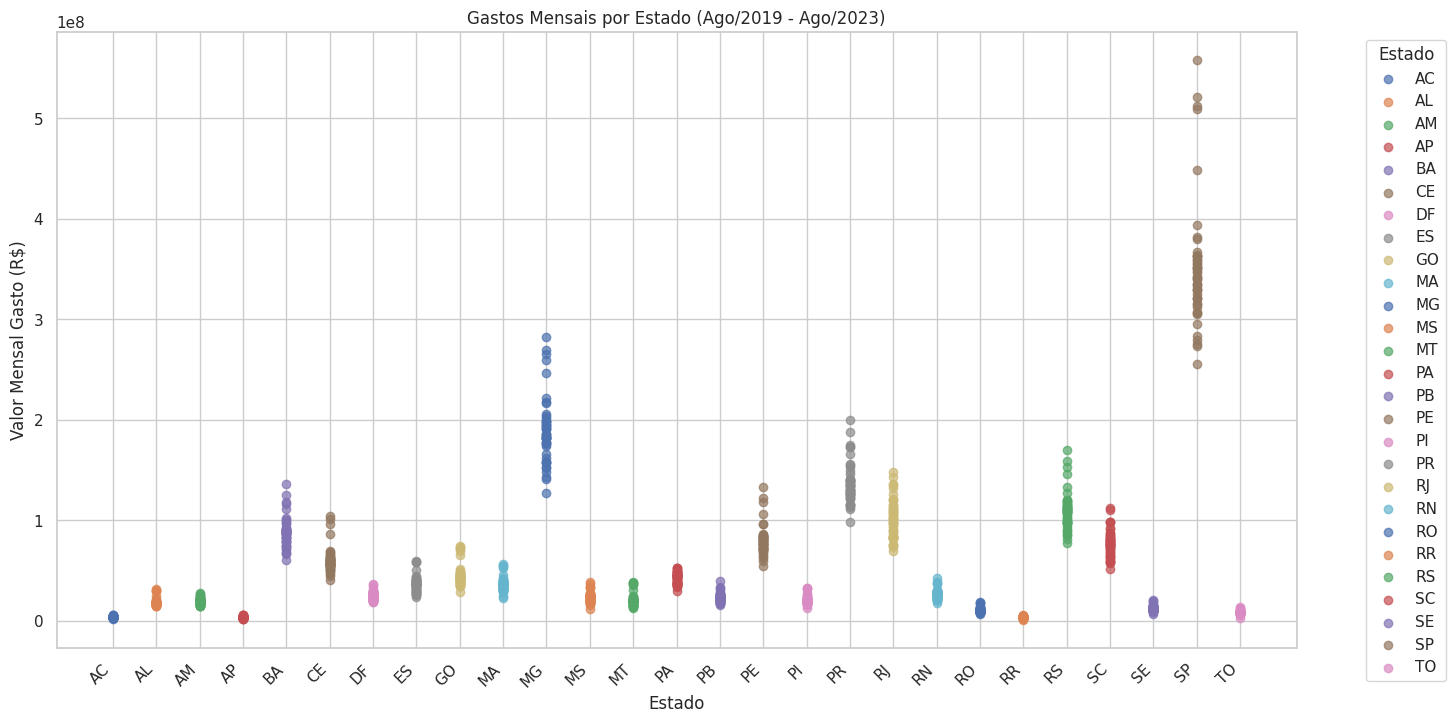

In [ ]:
# Selecionando os dados para todos os estados
dados_estados = df.groupby('sigla').sum().loc[:, '2019/Ago':'2023/Ago']

# Criando o gráfico de dispersão
plt.figure(figsize=(16, 8))

# Iterando sobre os estados
for estado in dados_estados.index:
    plt.scatter([estado] * len(dados_estados.columns), dados_estados.loc[estado].values, label=estado, alpha=0.7)

# Adicionando rótulos e título
plt.title('Gastos Mensais por Estado (Ago/2019 - Ago/2023)')
plt.xlabel('Estado')
plt.ylabel('Valor Mensal Gasto (R$)')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustando o espaçamento dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico de dispersão
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.



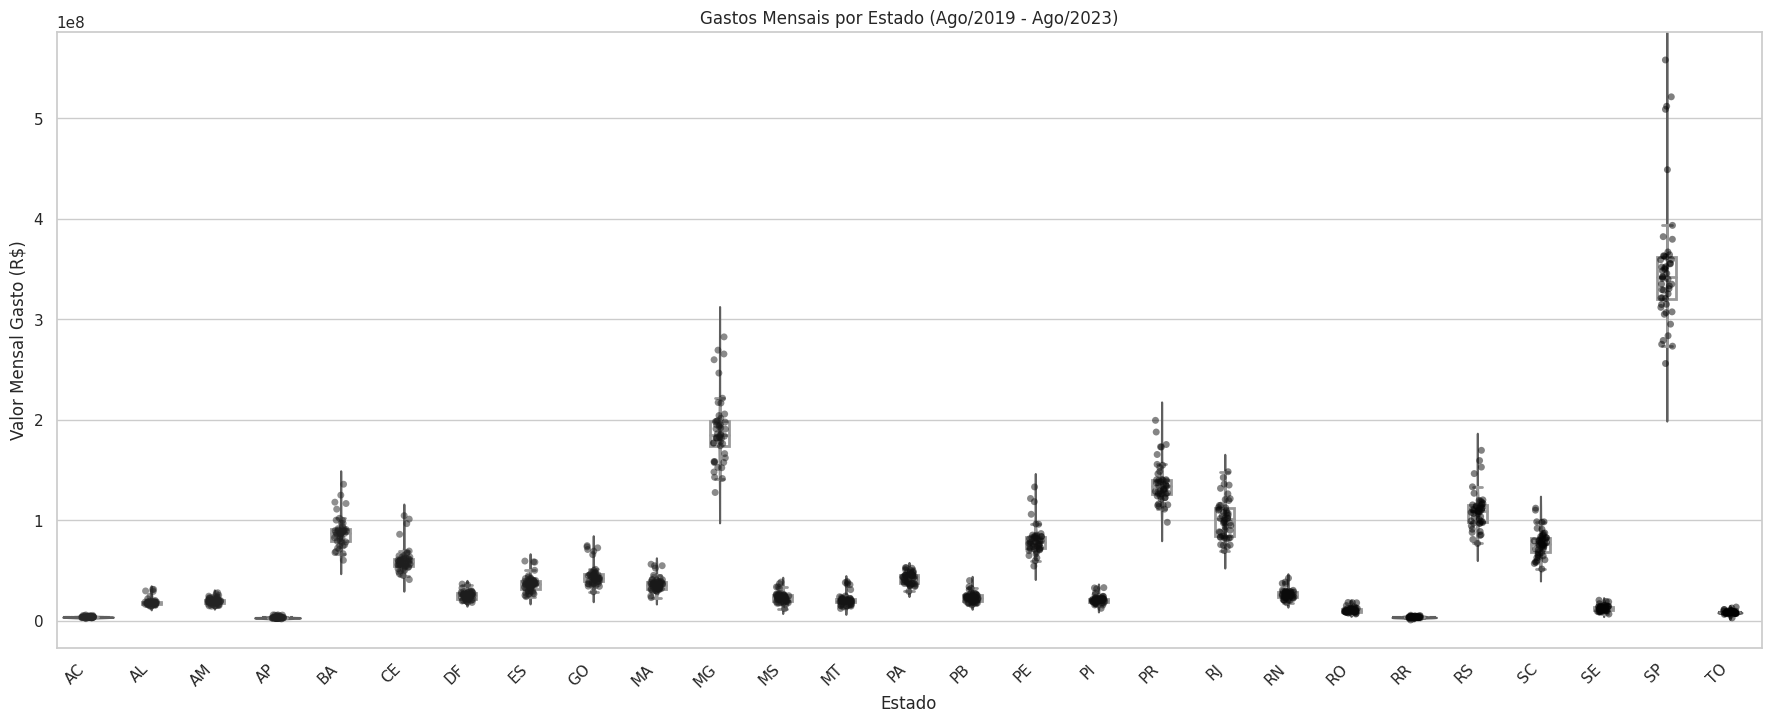

In [ ]:
# Selecionando os dados para todos os estados
dados_estados = df.groupby('sigla').sum().loc[:, '2019/Ago':'2023/Ago']

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando o gráfico combinado de dispersão, boxplot e violino
plt.figure(figsize=(22, 8))

# Adicionando boxplots e violinos para cada estado
sns.boxplot(data=dados_estados.T, width=0.3, showfliers=False, color="white", linewidth=2)
sns.violinplot(data=dados_estados.T, inner="quartile", palette="Set3")

# Adicionando o gráfico de dispersão com o Seaborn
sns.stripplot(data=dados_estados.T, jitter=True, alpha=0.5, size=5, color='black')

# Adicionando rótulos e título
plt.title('Gastos Mensais por Estado (Ago/2019 - Ago/2023)')
plt.xlabel('Estado')
plt.ylabel('Valor Mensal Gasto (R$)')

# Ajustando o espaçamento dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico combinado
plt.show()

In [ ]:
# Sazonalidade

linha_para_testar = 'SP'
# Suponha que 'df' seja seu DataFrame e 'SP' seja a sigla da linha que você deseja testar
linha_sp = df[df['sigla'] == 'SP'].iloc[:, 1:]  # Seleciona todas as colunas da linha 'SP'

# Transforma a linha em uma série temporal
serie_temporal_sp = linha_sp.values.flatten()

# Realiza o teste ADF
resultado_adf_sp = adfuller(serie_temporal_sp)

# Exibindo os resultados
print('Estatística ADF:', resultado_adf_sp[0])
print('Valor p:', resultado_adf_sp[1])
print('Valores críticos:', resultado_adf_sp[4])

Estatística ADF: -1.7151886966225587
Valor p: 0.4233042826919311
Valores críticos: {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}


<Figure size 1200x600 with 0 Axes>

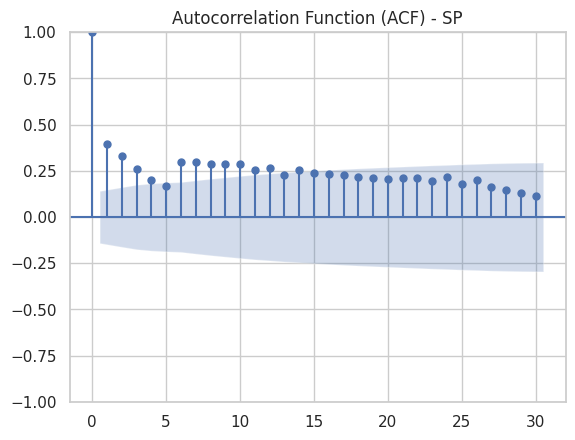

<Figure size 1200x600 with 0 Axes>

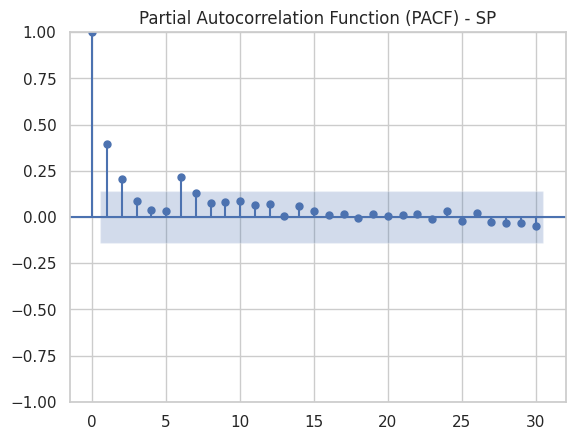

In [ ]:
# Suponha que 'df' seja seu DataFrame
linha_sp = df[df['sigla'] == 'SP'].iloc[:, 1:]  # Seleciona todas as colunas da linha 'SP'

# Transforma a linha em uma série temporal
serie_temporal_sp = linha_sp.values.flatten()

# Plotando ACF
plt.figure(figsize=(12, 6))
plot_acf(serie_temporal_sp, lags=30, title='Autocorrelation Function (ACF) - SP')
plt.show()

# Plotando PACF
plt.figure(figsize=(12, 6))
plot_pacf(serie_temporal_sp, lags=30, title='Partial Autocorrelation Function (PACF) - SP')
plt.show()


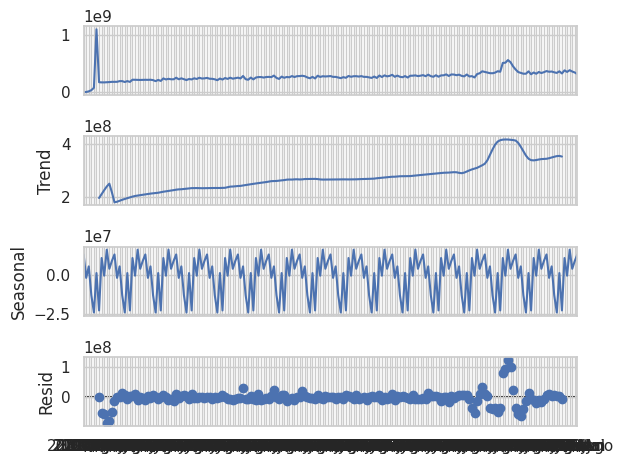

In [ ]:
# Suponha que 'df' seja seu DataFrame
linha_sp = df[df['sigla'] == 'SP'].iloc[:, 1:].transpose()  # Transpõe a linha 'SP'

# Ajusta o formato da data
linha_sp.columns = pd.to_datetime(linha_sp.columns, format='%Y/%m')

# Aplica a decomposição sazonal diretamente na série temporal 'linha_sp' com um período de 12 meses
result_sp = seasonal_decompose(linha_sp, model='additive', period=12)

# Plota os componentes
result_plot_sp = result_sp.plot()
plt.show()

# **Insights**

* A região do Brasil que mais gasta com Produção Hospitalar é a região Sudeste.

* É possível que os gastos tenham uma certa correlação com a população e o poder economico de cada um dos estados.

* Tomando como base o período de "Ago/2019 a Ago/2023" a grande maioria dos estados gasta menos que 1 milhão em reais mesalmente.

* Muito provavelmente a pandemia teve impacto no aumento de gastos durante o período de "Fev/2021 a Out/2021". Esse aumento fica visível analisando o gráfico dos gastos no estado de São Paulo.

* Olhando de maneira grosseira, os meses de dezembro de cada ano geralmente tem um gasto menor do que o mês de janeiro. Isso pode ser causado em função da disponibilização de novos orçamentos/planejamentos para os novos ciclos.

* Quando fazemos a análise para as séries temporais, conseguimos identificar uma sazonalizade no gráfico de SP, levando em consideração o período de 12 meses.

Com base nos insights extraídos acima, optamos por fazer os testes utilizando alguns modelos:

* Prophet
* AutoARIMA
* SeasonalNaive
* SeasonalWindowAverage
